# The Spark Foundation-Internship

# Data Science and Business Analytics

# Task-1

# Author-Md Haroon

 # Supervised Machine Learning to predict the percentage of an student  based on the no. of study hours

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# import the libraries that are required for the implementation of the code operation.

#### Here i am going to import  Pandas to  analyze data, NumPy to perform the multi-dimensional operation, and matplotlib to perform graphical plot.

In [9]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## The next phase is to load the data into the program to perform the desired operation.

In [2]:
url = "http://bit.ly/w-data"     # Reading data from remote link
df = pd.read_csv(url)

In [3]:
df.head()     #To read first 5 enties in the DF


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape      #size of DataFrame

(25, 2)

In [5]:
df.info()      # To find the datatypes and missing values if any


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.isnull().sum()  # To find out total null value in each column the null value

Hours     0
Scores    0
dtype: int64

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualization

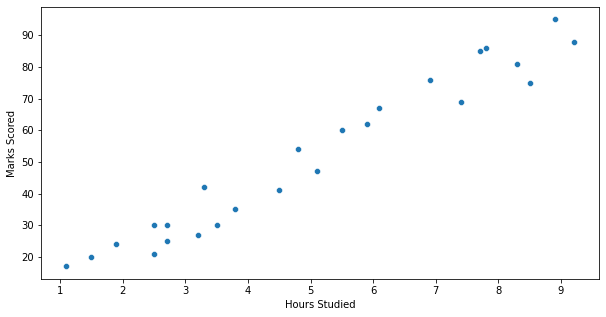

In [10]:
# Scatter plot to see the distribution of data
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.Hours,y=df.Scores)
plt.xlabel('Hours Studied')  
plt.ylabel('Marks Scored')  
plt.show()

#### >From the above graph we see that there is a positive linear relation between the number of Hours Studied and Marks Scored.

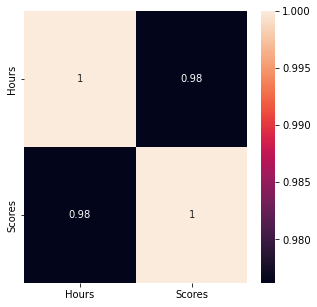

In [11]:
#correlation plot
plt.figure(figsize=(5,5))
correlation_matrix = df.corr()
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

#### >From the above graph we see that Hours and Scores are highly correlated.

# Train-Test Split 

In [14]:
# Dividing the DF to independent and dependent variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [15]:
# Spliting the X,y into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression


# Creating object and fitting the model
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)

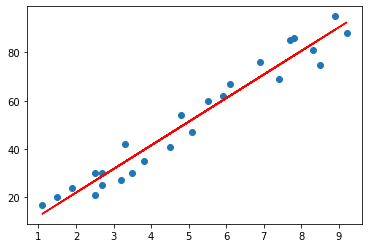

In [17]:
# Plotting the regression line
line = lin_reg.coef_*X+lin_reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color = 'red');
plt.show()

# Making Prediction

In [19]:
Y_pred =  lin_reg.predict(X_test)
Y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [21]:
# generating a dataframe to show the differences between actual and predicted score

df_predict = pd.DataFrame({"Hours": X_test.reshape(1,-1)[0] , "Actual Score" : y_test.reshape(1,-1)[0] , "Predicted Score" : Y_pred.reshape(1,-1)[0]})
df_predict

,Hours,Actual Score,Predicted Score
0,1.5,20,17.053665
1,3.2,27,33.694229
2,7.4,69,74.806209
3,2.5,30,26.842232
4,5.9,62,60.123359
5,3.8,35,39.567369
6,1.9,24,20.969092
7,7.8,86,78.721636


# Visualising the accuracy of the model

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


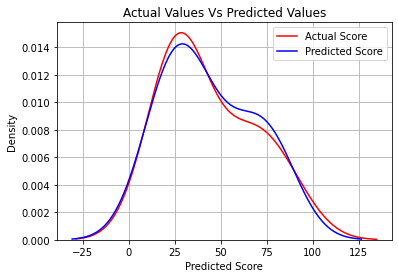

In [23]:
df_sorted = df_predict.sort_values(by = "Hours")
title = "Actual Values Vs Predicted Values"
ax1 = sns.distplot(df_sorted["Actual Score"], hist = False , color = "red" , label = "Actual Score")
sns.distplot(df_sorted["Predicted Score"] , hist = False , color = "blue" , label = "Predicted Score" , ax = ax1)
plt.legend()
plt.grid()
plt.title(title)
plt.show()

# Model Evaluation 

In [24]:
# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, Y_pred))
print("MAE:",mse)

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, Y_pred)))
print("RMSE:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test, Y_pred)
print("R-Square:",r2)

MAE: 4.419727808027652
RMSE: 4.792191274636315
R-Square: 0.9568211104435257


# Predicting the score

In [25]:
hours = np.array([9.25]) # No. of hours should be mentioned inside array for which we want to predict score
hours = hours.reshape(-1,1)
own_pred = model.predict(hours)
print("No of Hours = {}".format(float(hours)))
print("Predicted Score = {}".format(round(own_pred[0],2)))

No of Hours = 9.25
Predicted Score = 92.92


# Conclusion:

#### We used a Linear Regression Model to predict the score of a student if he/she studies for 9.25 hours/day and the Predicted Score came out to be 92.91.